<a href="https://colab.research.google.com/github/mohumedraslan/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


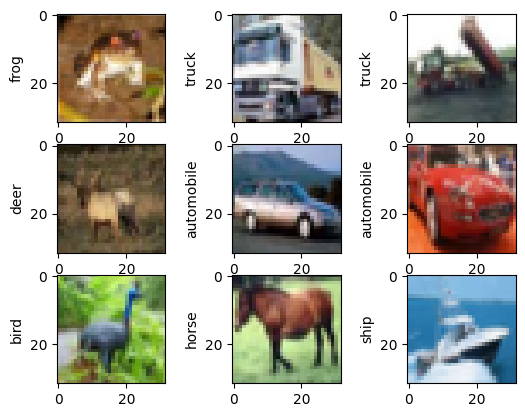

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,451,434 (5.54 MB)

 Trainable params: 1,451,434 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 232/1563 ━━━━━━━━━━━━━━━━━━━━ 7:04 319ms/step - accuracy: 0.1790 - loss: 2.2055

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, datasets, Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

# Data visualization
category_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
                 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

# Data preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Build CNN model
def CNN_classification_model(input_size=x_train.shape[1:]):
    model = Sequential([
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_size),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128),
        layers.Activation('relu'),
        layers.Dropout(0.25),
        layers.Dense(num_classes),
        layers.Activation('softmax')
    ])
    opt = optimizers.Adam(learning_rate=0.0001)  # Changed 'lr' to 'learning_rate'
    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=opt,
                 metrics=['accuracy'])
    return model

model = CNN_classification_model()
model.summary()

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path)

model.fit(x_train, y_train, batch_size=32, epochs=10,
          callbacks=[model_checkpoint], verbose=1)

# Evaluate the model
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

# Predict an image
new_model.predict(x_test[0:1])

# Visualize predictions
plt.figure()
for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_test[i])
    # Fix prediction method
    pred_probs = new_model.predict(x_test[i:i+1])
    pred = np.argmax(pred_probs, axis=1)[0]
    plt.title(f"pred: {category_dict[pred]}   actual: {category_dict[y_test[i][0]]}")
    plt.axis('off')
plt.show()